이미지 딥러닝 

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import sys
import os
os.environ["KMP_DUPLICATE_LIB_OK"]='1'

In [2]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [3]:
print(X_train.shape[0])

60000


In [4]:
print(X_test.shape[0])

10000


In [5]:
print(X_train.shape)

(60000, 28, 28)


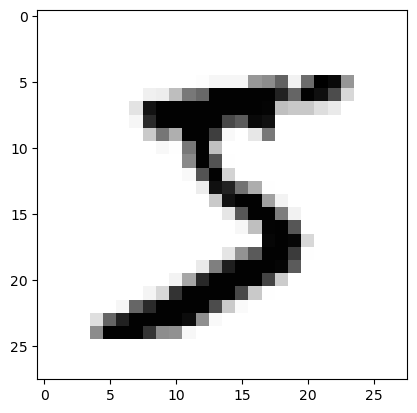

In [6]:
plt.imshow(X_train[0],cmap='Greys')
plt.show()

In [7]:
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%-3s' %i)
    sys.stdout.write('\n')
    

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [8]:
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np

In [9]:
X_train=X_train.reshape(X_train.shape[0],28*28).astype(float)/255
X_test=X_test.reshape(X_test.shape[0],28*28).astype(float)/255
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [10]:
print(y_train[0])

5


In [11]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [12]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [13]:
model =models.Sequential()
model.add(layers.Dense(512,input_dim=28*28,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss='categorical_crossentropy',optimizer='adam',
             metrics=['accuracy'])

In [15]:
eatly_stop = EarlyStopping(monitor='val_loss',patience=10)

In [16]:
history=model.fit(X_train,y_train,epochs=30,batch_size=200,
          validation_split=0.25,callbacks=[eatly_stop])

Epoch 1/30
225/225 [==============================] - 2s 6ms/step - loss: 0.3445 - accuracy: 0.9025 - val_loss: 0.1903 - val_accuracy: 0.9443
Epoch 2/30
225/225 [==============================] - 1s 4ms/step - loss: 0.1458 - accuracy: 0.9581 - val_loss: 0.1310 - val_accuracy: 0.9617
Epoch 3/30
225/225 [==============================] - 1s 4ms/step - loss: 0.0980 - accuracy: 0.9725 - val_loss: 0.1118 - val_accuracy: 0.9659
Epoch 4/30
225/225 [==============================] - 1s 4ms/step - loss: 0.0714 - accuracy: 0.9802 - val_loss: 0.1013 - val_accuracy: 0.9702
Epoch 5/30
225/225 [==============================] - 1s 4ms/step - loss: 0.0532 - accuracy: 0.9856 - val_loss: 0.0890 - val_accuracy: 0.9728
Epoch 6/30
225/225 [==============================] - 1s 4ms/step - loss: 0.0405 - accuracy: 0.9895 - val_loss: 0.0863 - val_accuracy: 0.9738
Epoch 7/30
225/225 [==============================] - 1s 4ms/step - loss: 0.0316 - accuracy: 0.9916 - val_loss: 0.0840 - val_accuracy: 0.9758
Epoch 

In [17]:
print('Test Accuracy: %.4f'%(model.evaluate(X_test,y_test)[1]))

313/313 [==============================] - 1s 1ms/step - loss: 0.0736 - accuracy: 0.9812
Test Accuracy: 0.9812


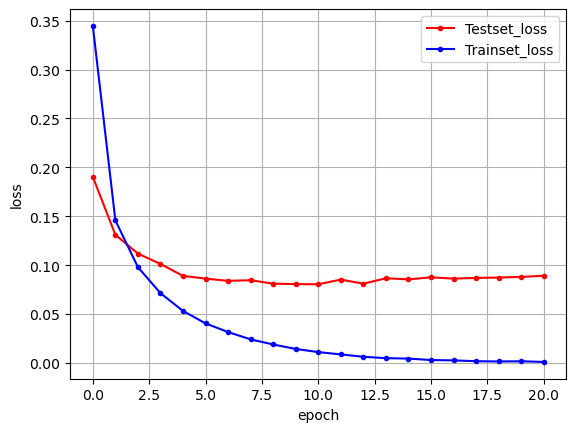

In [19]:
# 검증셋과 학습셋의 오차를 저장합니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 봅니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시해 보겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()